In [70]:
# o - attention 1-lookback 3-basic

DATASET_PATH = 'dataset'
JSON_PATH = "dataWithoutSplit.json"
CSV_PATH = "digit_data.csv"

import json
import os
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas
from sklearn.preprocessing import MinMaxScaler
import graphviz
import matplotlib.pyplot as plot
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report as cr
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:title={'center':'Class distribution (1: attention, 2: lookback, 3: basic)'}, xlabel='labelNumber', ylabel='count'>

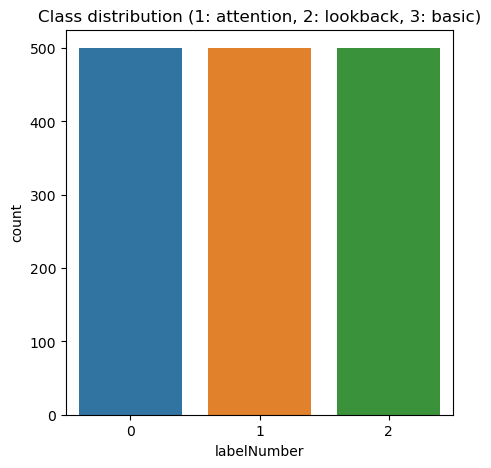

In [71]:
data = pandas.read_csv(CSV_PATH)

plt.figure(figsize=(5,5))
plt.title('Class distribution (1: attention, 2: lookback, 3: basic)')
locs, labels = plt.xticks()
sns.countplot(data['labelNumber'])

In [72]:
data.head()

Unnamed: 0  className  labelNumber       team1       team2      team3  \
0           0          3            0 -698.517761  143.488174  34.322342   
1           1          3            0 -653.516724   28.255615  16.907253   
2           2          3            0 -642.769714   38.158718  13.813417   
3           3          3            0 -632.615662   76.367653  12.105869   
4           4          3            0 -678.048645  118.276299  24.779367   

       team4      team5      team6     team7      team8      team9     team10  \
0  32.113888  19.648588   2.475709  2.649404  18.123703  -1.437847   8.891613   
1  50.708961   9.279743  27.187597 -6.607158   3.269727  11.100592  14.975985   
2  44.428982  10.278947  24.113579 -9.200873   4.390047   7.377244   9.947971   
3  63.981987  27.842545  -5.990053  2.897553   4.973987   0.153937  13.130610   
4  31.628336  22.074551  15.255008  9.782050   9.595336  -4.194691  10.916346   

      team11     team12    team13  
0  -3.480778  10.770462  8.597991  
1  -6.544557  11.314473  6.667259  
2  -6.116440   9.539093  4.809879  
3 -15.586259  11.430089  4.486773  
4  -8.539862   1.534509  4.059658

In [73]:
data.shape

(1500, 16)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1500 non-null   int64  
 1   className    1500 non-null   int64  
 2   labelNumber  1500 non-null   int64  
 3   team1        1500 non-null   float64
 4   team2        1500 non-null   float64
 5   team3        1500 non-null   float64
 6   team4        1500 non-null   float64
 7   team5        1500 non-null   float64
 8   team6        1500 non-null   float64
 9   team7        1500 non-null   float64
 10  team8        1500 non-null   float64
 11  team9        1500 non-null   float64
 12  team10       1500 non-null   float64
 13  team11       1500 non-null   float64
 14  team12       1500 non-null   float64
 15  team13       1500 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 187.6 KB


In [75]:
data.describe()

Unnamed: 0    className  labelNumber        team1        team2  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean    749.500000     2.000000     1.000000  -636.722148   102.060884   
std     433.157015     0.816769     0.816769    31.658844    30.639087   
min       0.000000     1.000000     0.000000  -731.293335    17.815567   
25%     374.750000     1.000000     0.000000  -658.663055    86.806211   
50%     749.500000     2.000000     1.000000  -638.630310   105.356022   
75%    1124.250000     3.000000     2.000000  -615.664734   122.894836   
max    1499.000000     3.000000     2.000000  -522.348694   163.112823   

             team3        team4        team5        team6        team7  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     10.655225    34.574970    17.361718     8.720075     1.249265   
std      11.861503    14.400474    10.927392    10.190822     6.856738   
min     -28.352232     5.515638   -19.571276   -22.862482   -23.086670   
25%       3.354101    24.511042    11.816065     1.535326    -3.043577   
50%      12.654777    31.922710    18.739813     9.315925     1.661544   
75%      19.551749    42.332532    24.586870    15.854108     6.083659   
max      40.942493    77.079643    40.139900    36.437206    18.838806   

             team8        team9       team10       team11       team12  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.595708    -1.124552     9.271102    -2.613830     9.985571   
std       8.177280     6.236261     5.883953     7.145980     4.791018   
min     -22.413017   -23.405399    -7.876202   -18.754019    -6.964868   
25%      -4.954115    -5.291153     5.321845    -7.680357     7.212271   
50%       1.440096    -0.726146     9.261660    -4.010722    10.165533   
75%       6.181012     3.096264    12.576727     2.317598    13.068605   
max      22.826130    22.157005    30.077122    17.777351    24.941036   

            team13  
count  1500.000000  
mean      1.317237  
std       5.763709  
min     -18.602575  
25%      -2.826820  
50%       2.025477  
75%       5.993599  
max      14.055517

In [76]:
data.duplicated().sum()

0

In [77]:
data.isnull().sum()

Unnamed: 0     0
className      0
labelNumber    0
team1          0
team2          0
team3          0
team4          0
team5          0
team6          0
team7          0
team8          0
team9          0
team10         0
team11         0
team12         0
team13         0
dtype: int64

In [78]:
def bar_plot(variable):
      
    # get feature 
    var = data[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(5,5))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

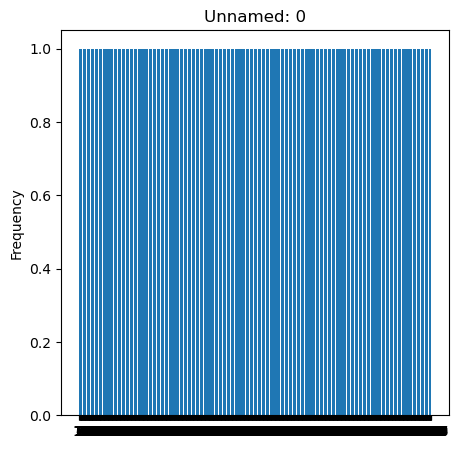

Unnamed: 0:
0       1
997     1
1006    1
1005    1
1004    1
       ..
497     1
496     1
495     1
494     1
1499    1
Name: Unnamed: 0, Length: 1500, dtype: int64


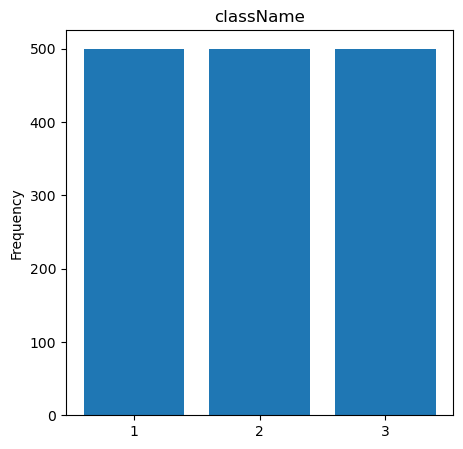

className:
3    500
2    500
1    500
Name: className, dtype: int64


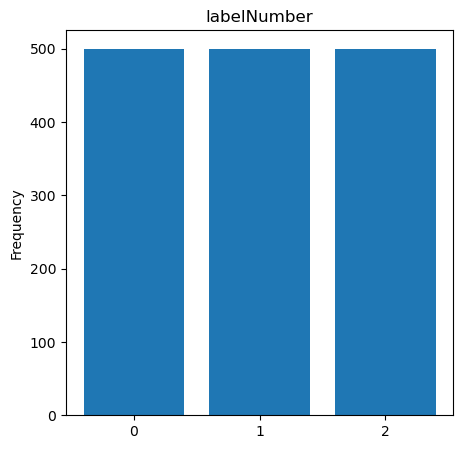

labelNumber:
0    500
1    500
2    500
Name: labelNumber, dtype: int64


In [79]:
team = ['Unnamed: 0','className','labelNumber']
for c in team:
    bar_plot(c)

In [80]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins=15)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

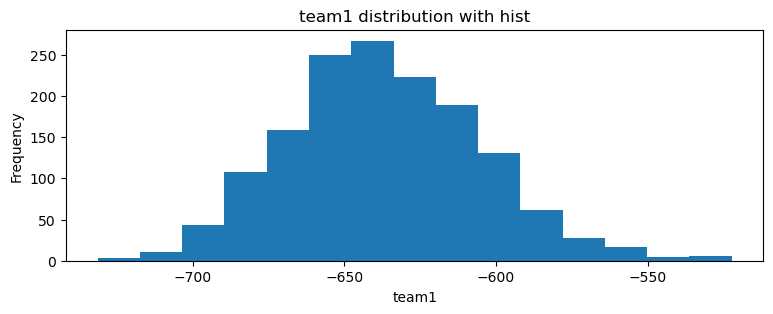

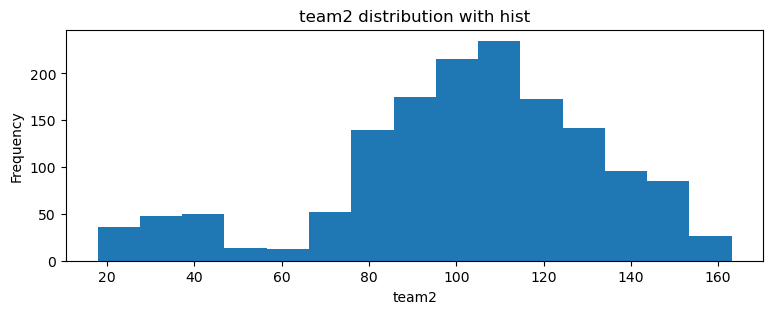

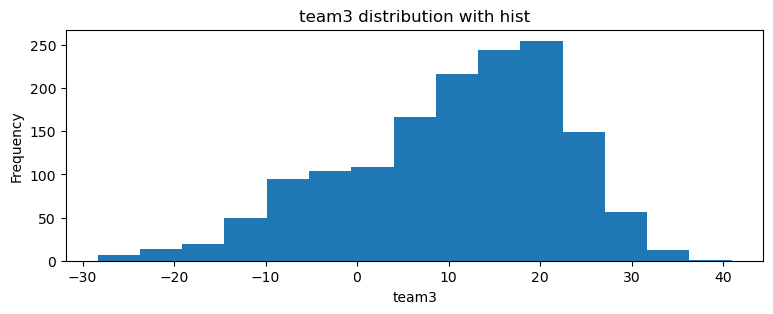

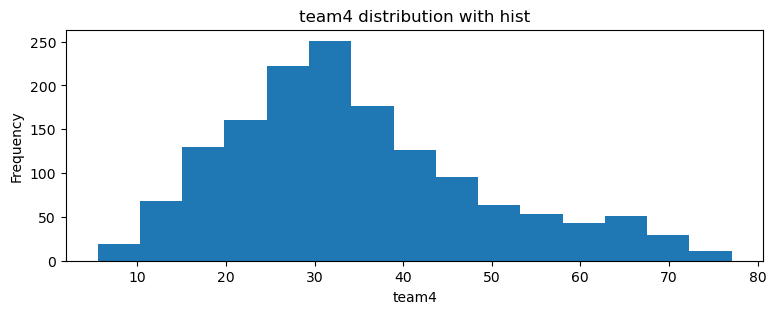

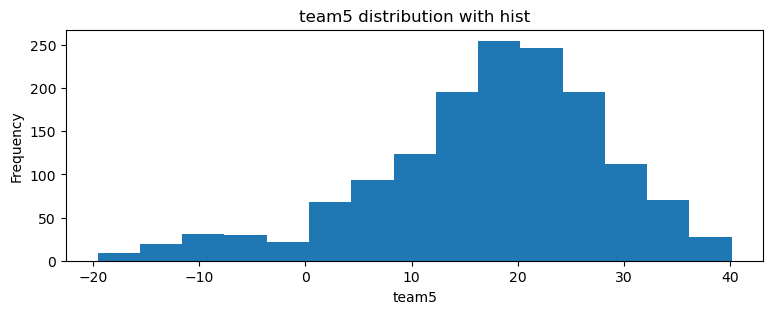

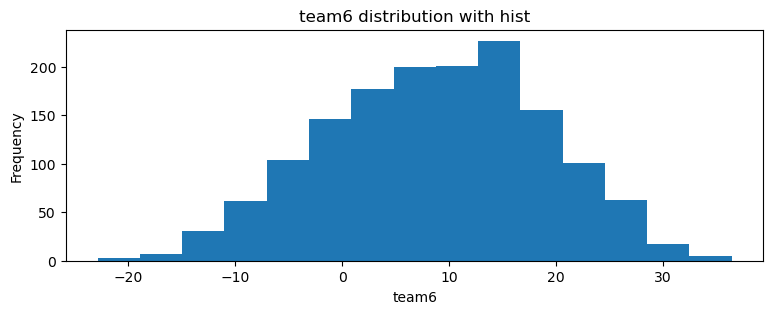

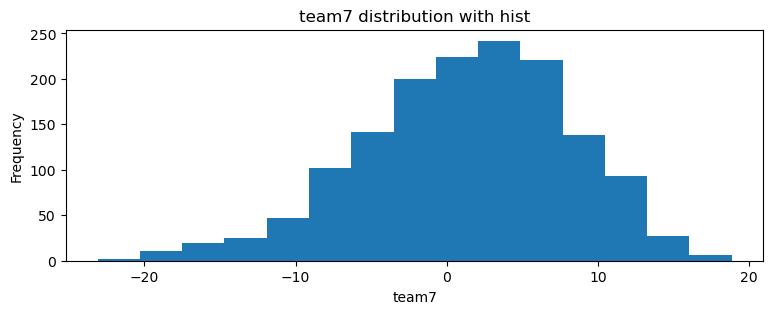

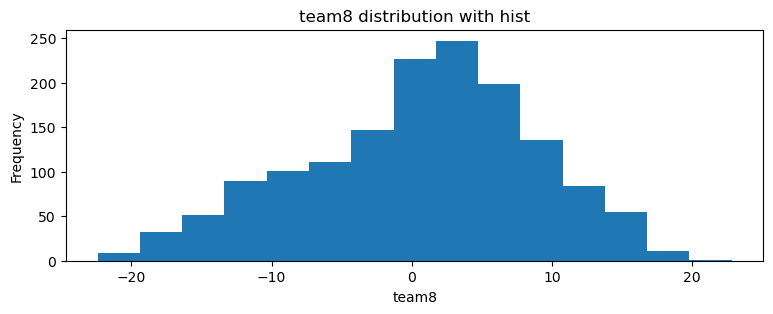

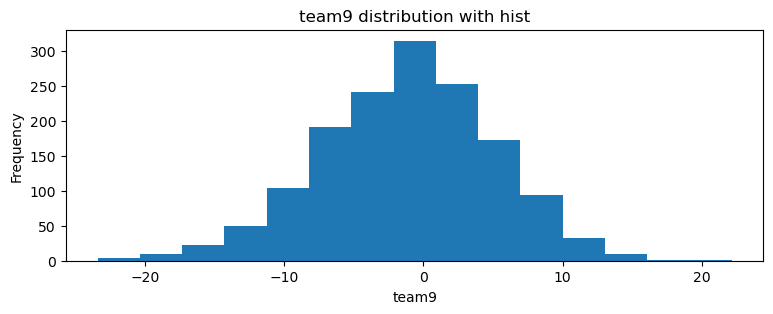

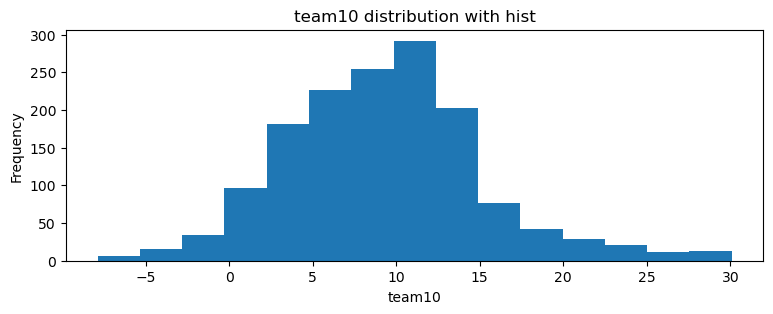

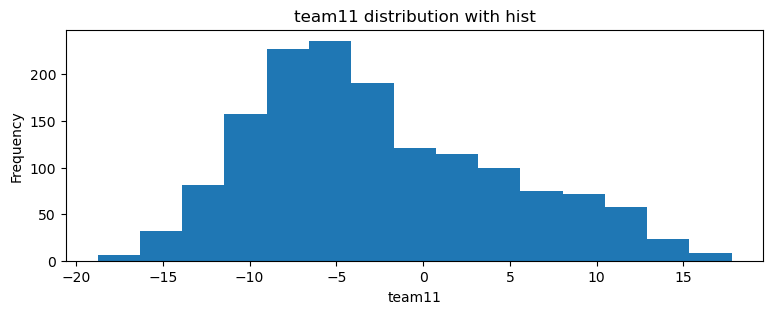

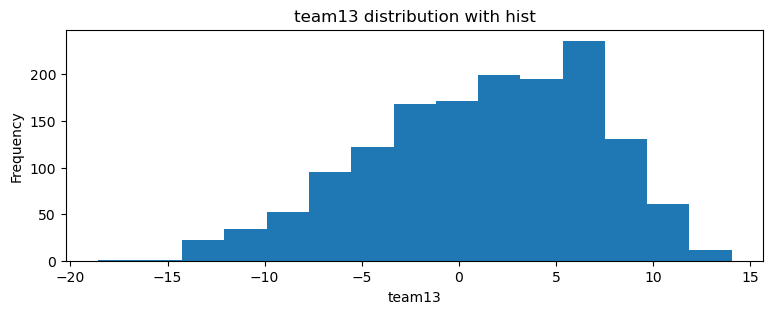

In [81]:
team = ['team1','team2','team3','team4','team5','team6','team7','team8','team9','team10','team11','team13']
for c in team:
    plot_hist(c)

In [82]:
def box_plot(x1):
    sns.boxplot(x=x1, data=data,palette="Paired")
    plt.show()

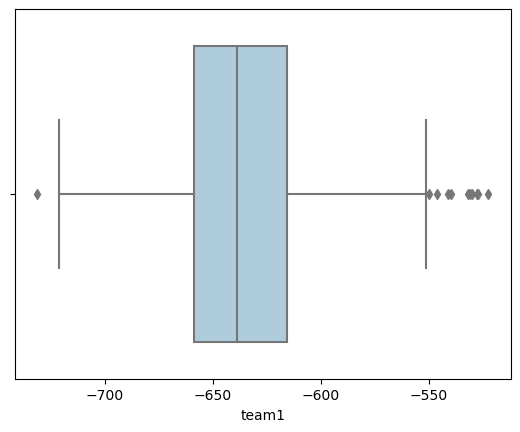

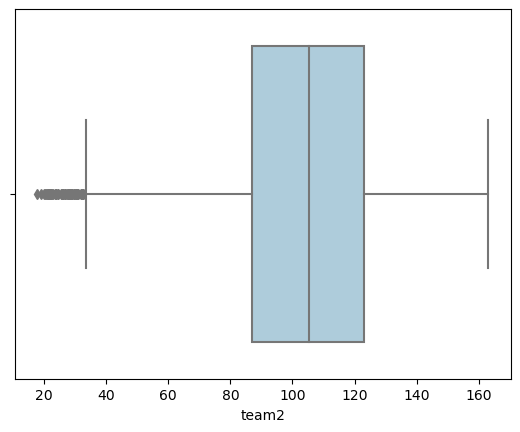

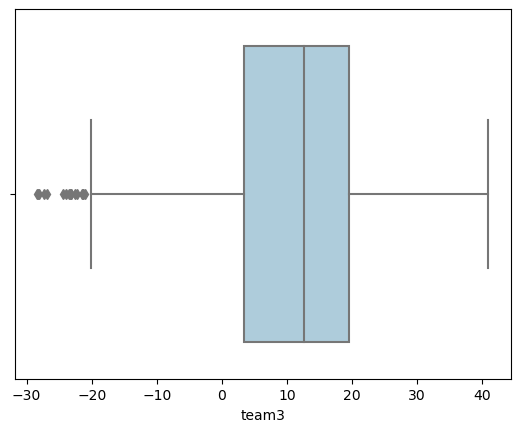

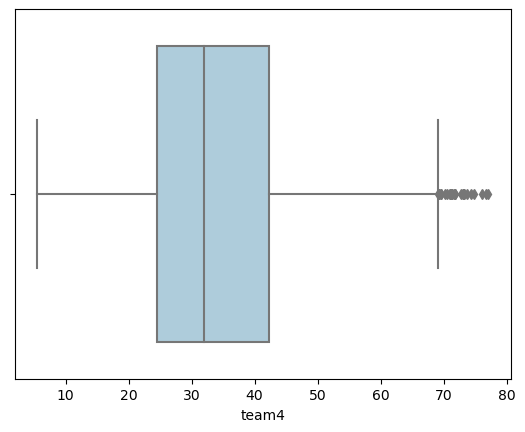

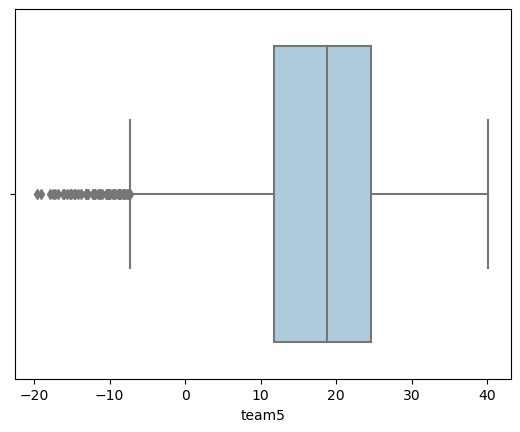

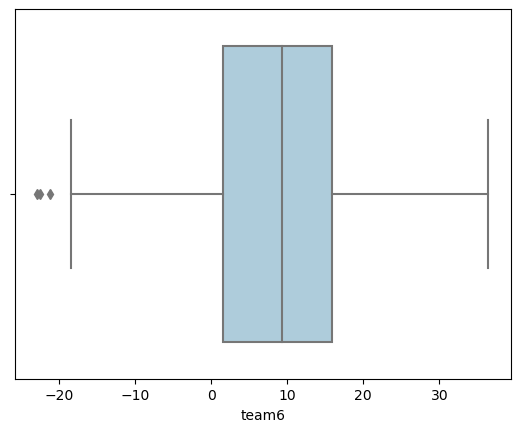

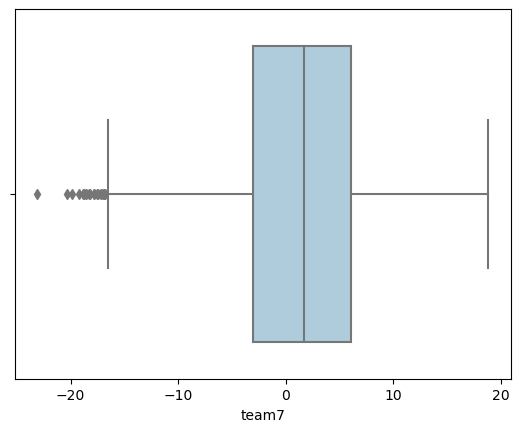

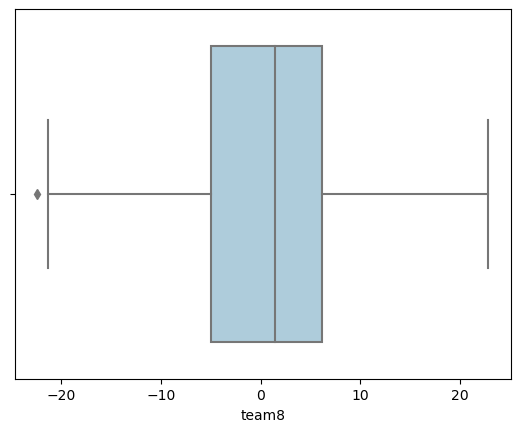

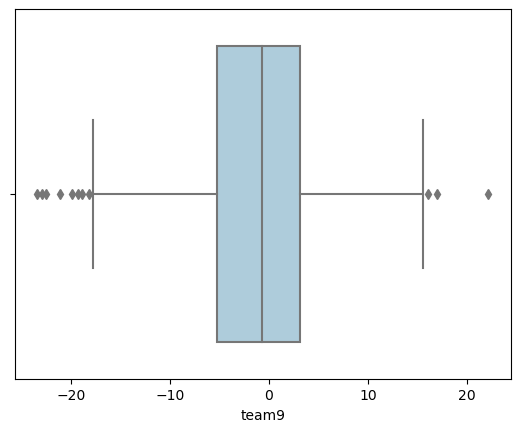

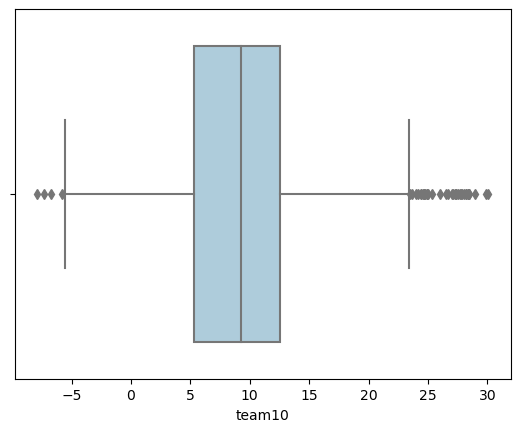

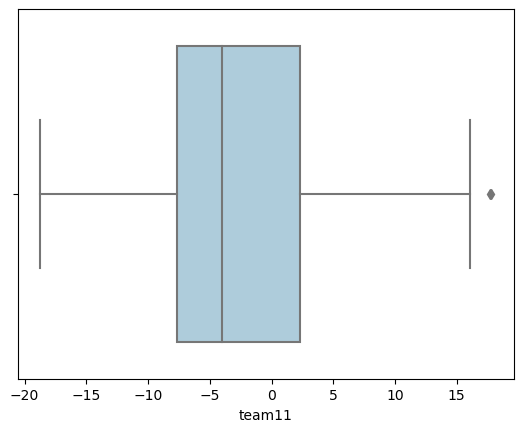

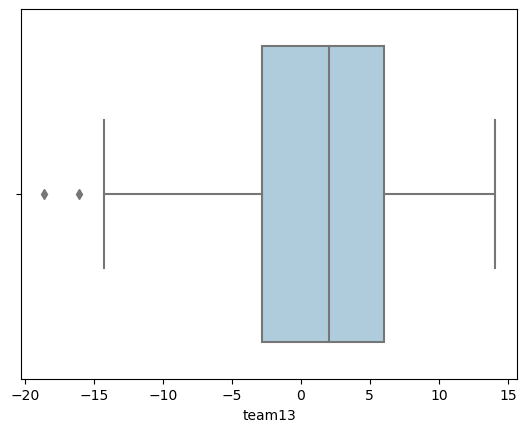

In [83]:
for i in team:
    box_plot(i)

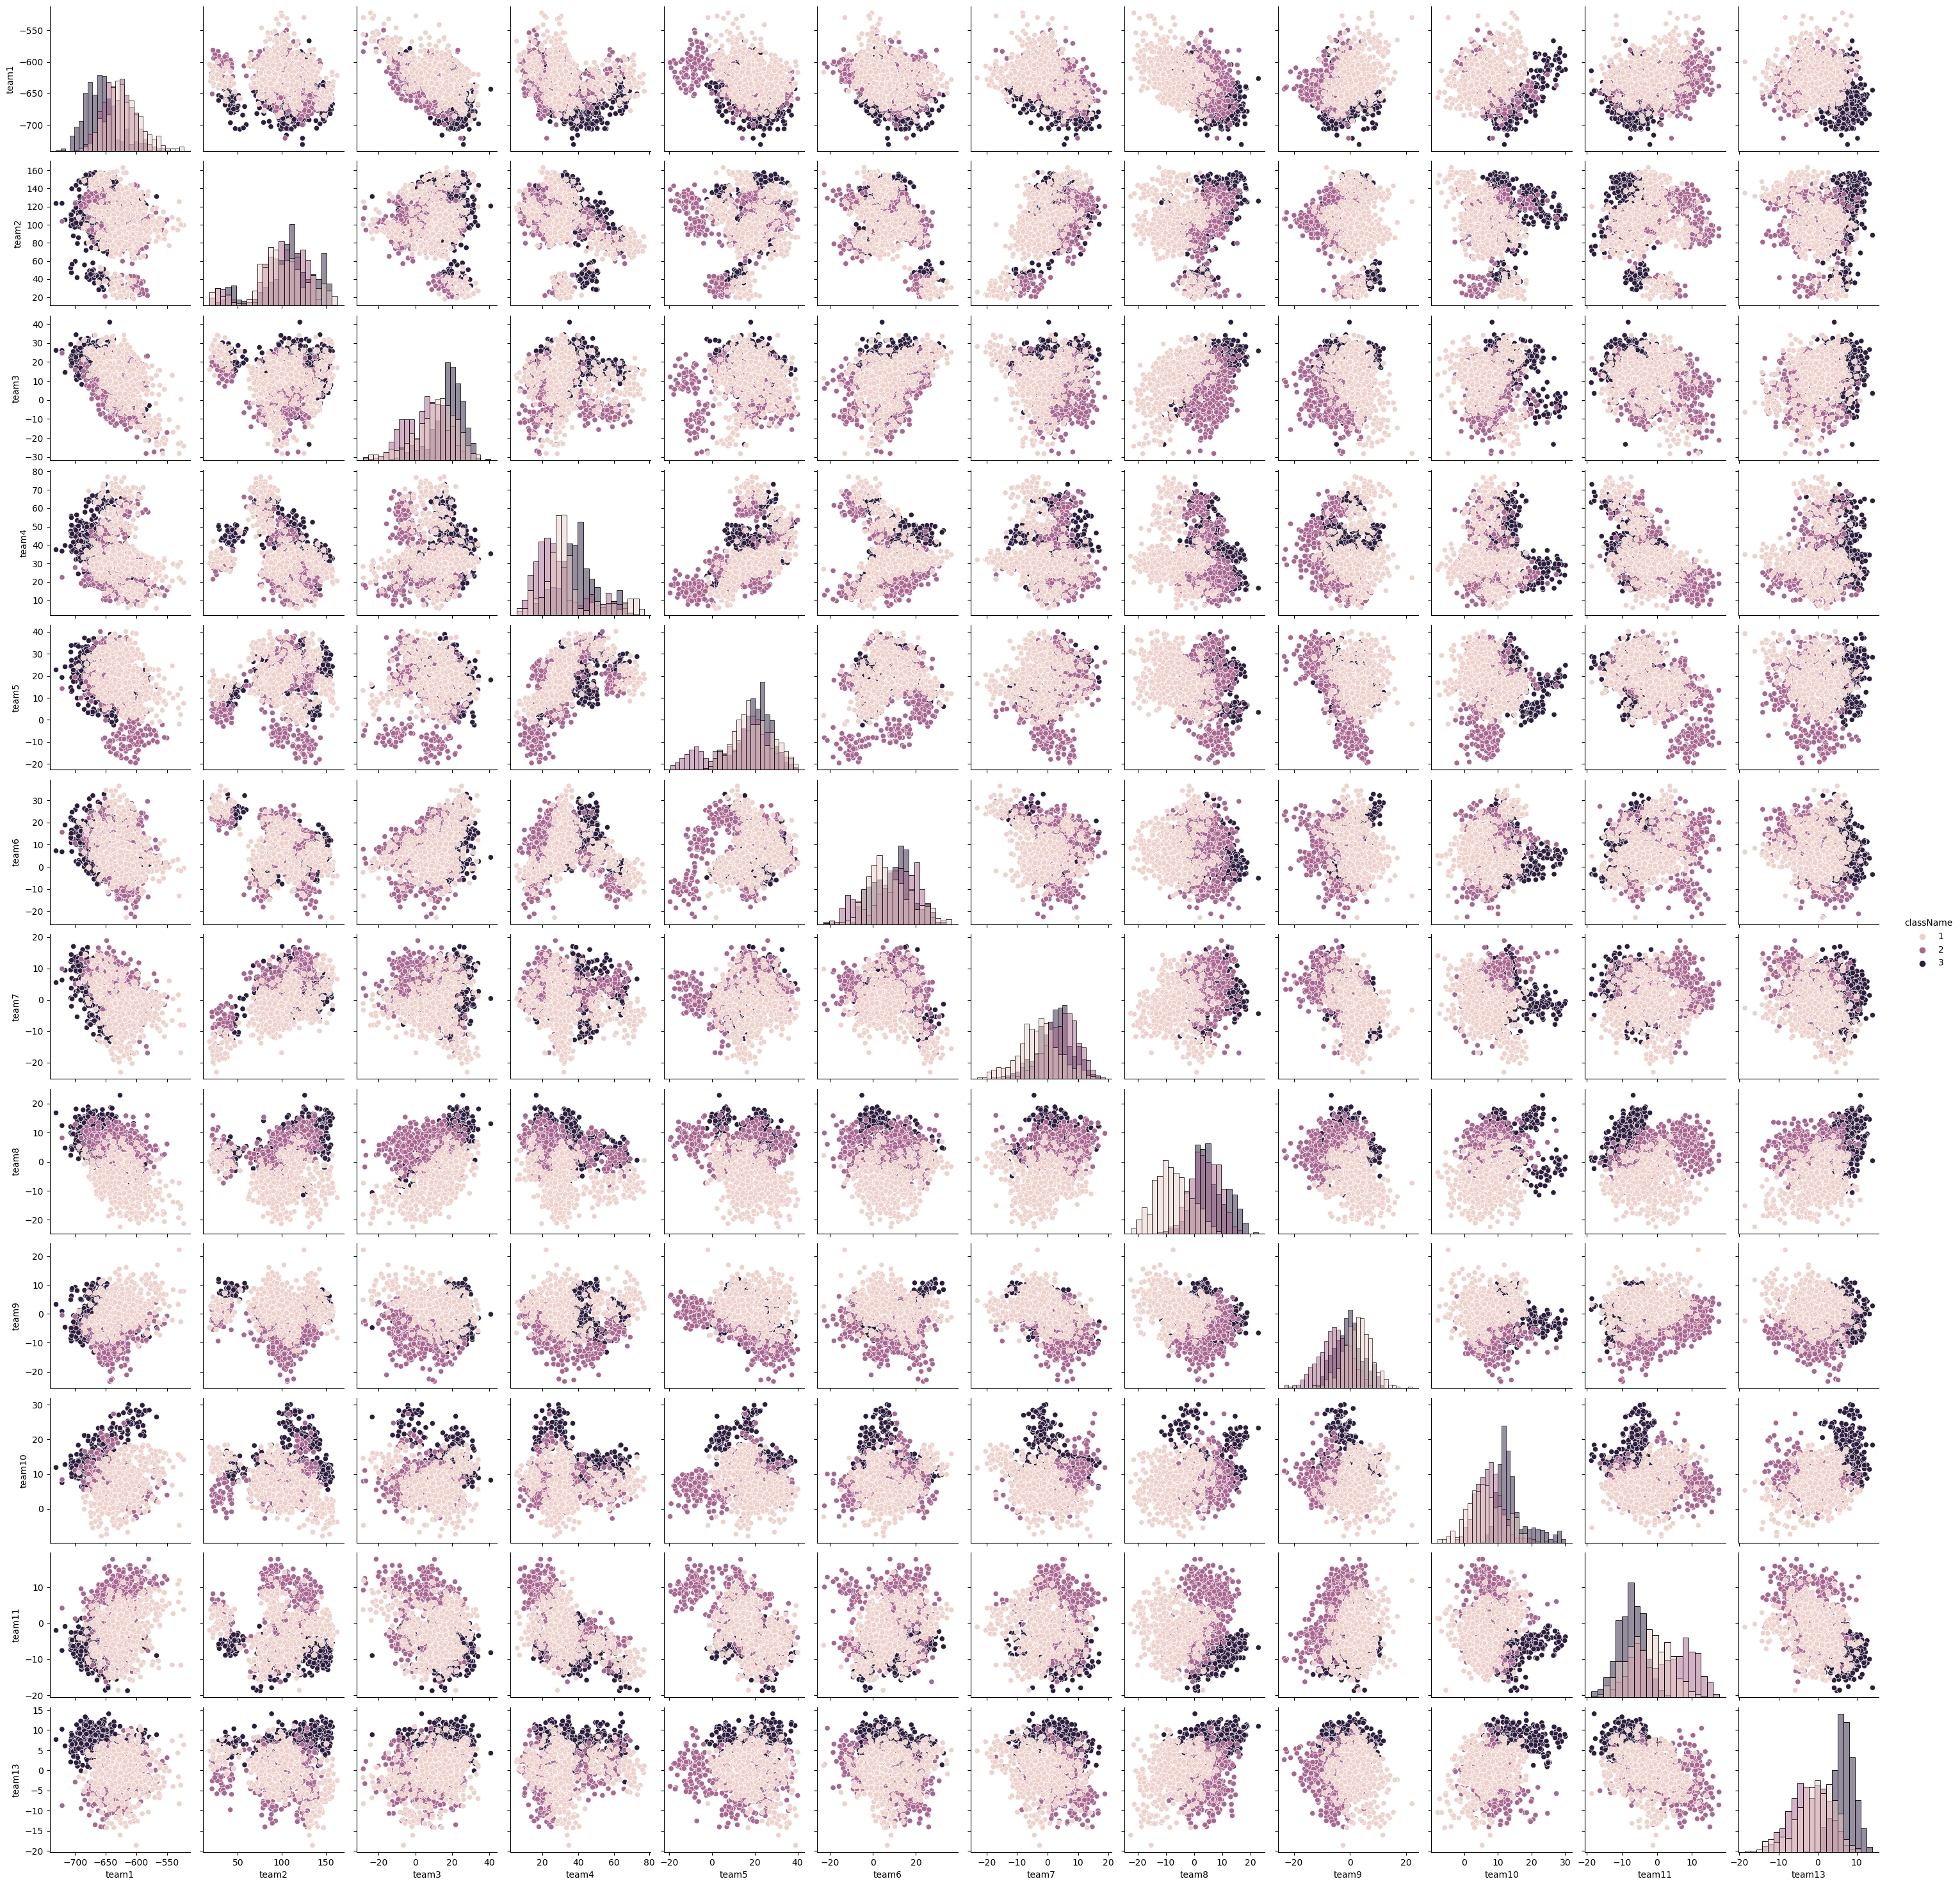

In [84]:
sns.pairplot(data, hue="className", kind = 'scatter', vars = ['team1','team2','team3','team4','team5','team6','team7','team8','team9','team10','team11','team13'],diag_kind = 'hist')

In [85]:
data.corr()

Unnamed: 0  className  labelNumber     team1     team2     team3  \
Unnamed: 0     1.000000  -0.942809     0.942809  0.458816 -0.135059 -0.212532   
className     -0.942809   1.000000    -1.000000 -0.491349  0.135600  0.240876   
labelNumber    0.942809  -1.000000     1.000000  0.491349 -0.135600 -0.240876   
team1          0.458816  -0.491349     0.491349  1.000000 -0.228719 -0.617786   
team2         -0.135059   0.135600    -0.135600 -0.228719  1.000000 -0.064308   
team3         -0.212532   0.240876    -0.240876 -0.617786 -0.064308  1.000000   
team4         -0.136639   0.137013    -0.137013 -0.239592 -0.349345  0.046305   
team5         -0.019404   0.026851    -0.026851 -0.353618  0.119142  0.061572   
team6         -0.059877   0.075265    -0.075265 -0.232429 -0.417809  0.332641   
team7         -0.301963   0.317948    -0.317948 -0.426231  0.556051 -0.025357   
team8         -0.617753   0.657272    -0.657272 -0.481033  0.153131  0.318287   
team9          0.192678  -0.209406     0.209406  0.190145 -0.144737 -0.005723   
team10        -0.493302   0.527714    -0.527714 -0.106574 -0.027698 -0.000193   
team11         0.265024  -0.272103     0.272103  0.330206 -0.053407 -0.337238   
team12        -0.067084   0.063373    -0.063373  0.299154 -0.016028 -0.326961   
team13        -0.516250   0.540470    -0.540470 -0.246389 -0.036074  0.336980   

                team4     team5     team6     team7     team8     team9  \
Unnamed: 0  -0.136639 -0.019404 -0.059877 -0.301963 -0.617753  0.192678   
className    0.137013  0.026851  0.075265  0.317948  0.657272 -0.209406   
labelNumber -0.137013 -0.026851 -0.075265 -0.317948 -0.657272  0.209406   
team1       -0.239592 -0.353618 -0.232429 -0.426231 -0.481033  0.190145   
team2       -0.349345  0.119142 -0.417809  0.556051  0.153131 -0.144737   
team3        0.046305  0.061572  0.332641 -0.025357  0.318287 -0.005723   
team4        1.000000  0.511666 -0.127488 -0.077772 -0.135698  0.051608   
team5        0.511666  1.000000  0.134910  0.163591 -0.220303 -0.220641   
team6       -0.127488  0.134910  1.000000 -0.166154 -0.016361 -0.075286   
team7       -0.077772  0.163591 -0.166154  1.000000  0.321305 -0.474926   
team8       -0.135698 -0.220303 -0.016361  0.321305  1.000000 -0.333273   
team9        0.051608 -0.220641 -0.075286 -0.474926 -0.333273  1.000000   
team10       0.010351 -0.018482  0.050722 -0.008907  0.309871 -0.059441   
team11      -0.575994 -0.525498  0.136703 -0.066136  0.024033  0.054291   
team12      -0.239557 -0.473951 -0.123658 -0.004575  0.074447  0.028998   
team13       0.224632  0.047493 -0.082335 -0.101198  0.337990  0.003432   

               team10    team11    team12    team13  
Unnamed: 0  -0.493302  0.265024 -0.067084 -0.516250  
className    0.527714 -0.272103  0.063373  0.540470  
labelNumber -0.527714  0.272103 -0.063373 -0.540470  
team1       -0.106574  0.330206  0.299154 -0.246389  
team2       -0.027698 -0.053407 -0.016028 -0.036074  
team3       -0.000193 -0.337238 -0.326961  0.336980  
team4        0.010351 -0.575994 -0.239557  0.224632  
team5       -0.018482 -0.525498 -0.473951  0.047493  
team6        0.050722  0.136703 -0.123658 -0.082335  
team7       -0.008907 -0.066136 -0.004575 -0.101198  
team8        0.309871  0.024033  0.074447  0.337990  
team9       -0.059441  0.054291  0.028998  0.003432  
team10       1.000000 -0.130923 -0.058465  0.392879  
team11      -0.130923  1.000000  0.352118 -0.501165  
team12      -0.058465  0.352118  1.000000 -0.206414  
team13       0.392879 -0.501165 -0.206414  1.000000

<AxesSubplot:>

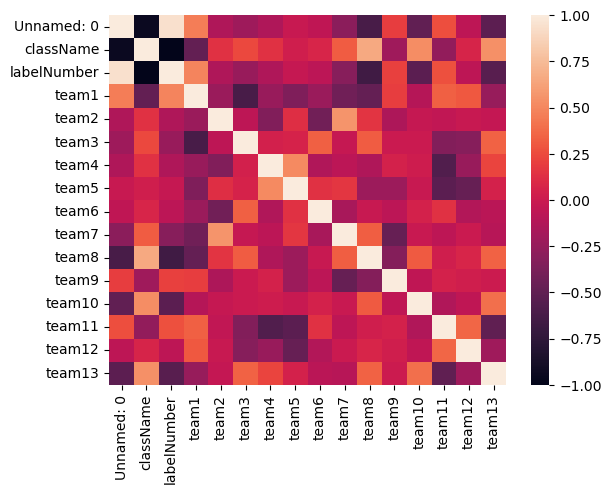

In [86]:
sns.heatmap(data.corr())

In [87]:

scaler = MinMaxScaler() 
Xlist = [data['team1'],data['team2'],data['team3'],data['team4'],data['team5'],data['team6'],data['team7'],data['team8'],data['team9'],data['team10'],data['team11'],data['team12'],data['team13']]
Xlist = scaler.fit_transform(Xlist)
yTrueList = data['labelNumber']
X = np.array(Xlist)
X= X.T
Y = np.array(yTrueList)
Y = Y.T


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle = 'true',random_state= 8)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) #0.25*8

print("Number of training examples: " + str(len(X_train)))
print("Number of testing examples: " + str(len(X_test)))
#print("Number of validation examples: " + str(len(X_val)))


Number of training examples: 1200
Number of testing examples: 300


In [88]:
def runLogisticRegression():
    print("------------LOG REG-------------------")
    #Logistic regression
    logisticRegr = LogisticRegression()
    modelLog = logisticRegr.fit(X_train, y_train)
    predictLog = modelLog.predict(X_test)
    print("%0.2f accuracy for logistic regression" % accuracy_score(y_test, predictLog) )
    print(cr(y_test,predictLog))
    cm = confusion_matrix(y_test, predictLog)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion matrix for Logistic regression ')
    plt.show()

------------LOG REG-------------------
0.78 accuracy for logistic regression
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       104
           1       0.71      0.91      0.79        98
           2       0.78      0.70      0.74        98

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.78       300
weighted avg       0.80      0.78      0.78       300



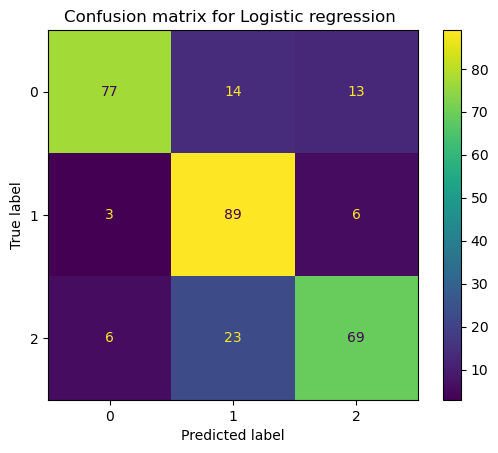

In [89]:
if __name__ == "__main__":
    

    runLogisticRegression()

In [90]:
def runDTreeWithoutPruning():
    print("------------DTREE-------------------") # noise in data , stronger learner
    #Dtree
    scikitDescTree = tree.DecisionTreeClassifier(criterion="gini")
    dtreemodel = scikitDescTree.fit(X_train, y_train)
    #predictsDTree = scikitDescTree.predict(X_val)
    print("Depth of the Dtree(without pruning) learned: "+str(dtreemodel.get_depth()))
    print("training accuarcy of dTREE(without pruning): "+str(dtreemodel.score(X_train, y_train)))
    print("feature Importances : ")
    print(scikitDescTree.feature_importances_)
    valscore = crossValidation(scikitDescTree)
    print("Accuracy of the Dtree(without pruning) learned: " + str(valscore))
    print("-------------------------------")
    #Speculate DTree
#     dot_data = tree.export_graphviz(scikitDescTree, out_file=None)
#     graph = graphviz.Source(dot_data)
#     graph.format = 'png'
#     graph.render("DTree Structure")
    plot.show()
    return dtreemodel.get_depth()


In [91]:
if __name__ == "__main__":
    

    
    depth = runDTreeWithoutPruning()
    

------------DTREE-------------------
Depth of the Dtree(without pruning) learned: 17
training accuarcy of dTREE(without pruning): 1.0
feature Importances : 
[0.         0.         0.12333761 0.02221808 0.03446006 0.028414
 0.03601236 0.19245765 0.12799179 0.08897304 0.17948587 0.09596017
 0.07068937]
Accuracy of the Dtree(without pruning) learned: 0.8533333333333333
-------------------------------


In [92]:
def dtreeAnalysis(maxdepth):
    
    print("------------DTREE ANALYSIS-------------------")
    dtreeTrainAccuracies = []
    dtreeValAccuracies = []
    depths = []
    for depth in range(1,27):
        print(" for depth"+ str(depth))
        scikitDescTree = tree.DecisionTreeClassifier(criterion="gini",max_depth=depth)
        dtreemodel = scikitDescTree.fit(X_train, y_train)
        #predictsDTree = scikitDescTree.predict(X_val)
        trainScore = dtreemodel.score(X_train, y_train)
        print("training accuarcy of dTREE : "+str(trainScore))
        dtreeTrainAccuracies.append(trainScore*100)
        validationScore = crossValidation(dtreemodel)
        print("validation accuarcy of dTREE : "+str(validationScore))
        dtreeValAccuracies.append(validationScore*100)
        depths.append(depth)
    
    plt.figure()
    plt.plot(depths, dtreeValAccuracies , marker='o')
    plt.plot(depths, dtreeTrainAccuracies, marker='s')
    plt.xlabel('depth', fontsize= 10)
    plt.ylabel('Validation/train accuracy', fontsize= 10)
    plt.legend(['Validation accuracy', 'Training accuracy'], fontsize=10)
    plt.title('Tuning depth for dTree')
    #plt.axis([2, 25, 15, 60])

------------DTREE ANALYSIS-------------------
 for depth1
training accuarcy of dTREE : 0.4175
validation accuarcy of dTREE : 0.4083333333333333
 for depth2
training accuarcy of dTREE : 0.48833333333333334
validation accuarcy of dTREE : 0.4533333333333333
 for depth3
training accuarcy of dTREE : 0.54
validation accuarcy of dTREE : 0.5116666666666666
 for depth4
training accuarcy of dTREE : 0.6125
validation accuarcy of dTREE : 0.565
 for depth5
training accuarcy of dTREE : 0.6775
validation accuarcy of dTREE : 0.6183333333333334
 for depth6
training accuarcy of dTREE : 0.7533333333333333
validation accuarcy of dTREE : 0.6825
 for depth7
training accuarcy of dTREE : 0.8233333333333334
validation accuarcy of dTREE : 0.7341666666666667
 for depth8
training accuarcy of dTREE : 0.8475
validation accuarcy of dTREE : 0.7541666666666668
 for depth9
training accuarcy of dTREE : 0.8875
validation accuarcy of dTREE : 0.7925
 for depth10
training accuarcy of dTREE : 0.9166666666666666
validation ac

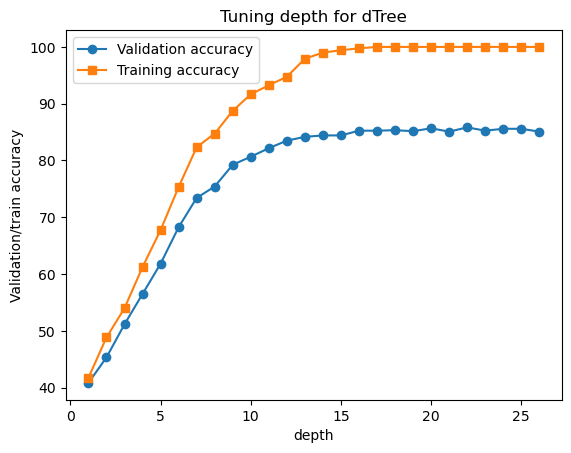

In [93]:
if __name__ == "__main__":
    

    
    dtreeAnalysis(depth)
    

In [94]:
def knnAnalysis():
    print("------------KNN-------------------")
    #Import knearest neighbors Classifier model
    knnTrainAccuracies = []
    knnValAccuracies = []
    newK = []
    for i in range (1 ,25): #480
      #Create KNN Clas n_neighbors = i
      print("k value:" + str(i))
      knn = KNeighborsClassifier(i)
      knn.fit(X_train, y_train)
      print("training accuarcy of knnmodel : "+str(knn.score(X_train, y_train)))
      knnTrainAccuracies.append(knn.score(X_train, y_train)*100)
      #knn_y_pred = knn.predict(X_val)
      valScore = crossValidation(knn)
      print("validation accuracy scores of knn : "+ str(valScore))
      knnValAccuracies.append(valScore*100)
      newK.append(i)
     
    plt.figure()
    plt.plot(newK, knnValAccuracies , marker='o')
    plt.plot(newK, knnTrainAccuracies, marker='s')
    plt.xlabel('K values')
    plt.ylabel('Validation/train accuracy')
    plt.legend(['Validation accuracy', 'train accuracy'])
    plt.title('Tuning k for K-NN')
    

------------KNN-------------------
k value:1
training accuarcy of knnmodel : 1.0
validation accuracy scores of knn : 0.9724999999999999
k value:2
training accuarcy of knnmodel : 0.98
validation accuracy scores of knn : 0.9649999999999999
k value:3
training accuarcy of knnmodel : 0.9841666666666666
validation accuracy scores of knn : 0.9741666666666667
k value:4
training accuarcy of knnmodel : 0.9766666666666667
validation accuracy scores of knn : 0.9599999999999997
k value:5
training accuarcy of knnmodel : 0.9791666666666666
validation accuracy scores of knn : 0.9658333333333331
k value:6
training accuarcy of knnmodel : 0.9725
validation accuracy scores of knn : 0.9608333333333332
k value:7
training accuarcy of knnmodel : 0.975
validation accuracy scores of knn : 0.9641666666666666
k value:8
training accuarcy of knnmodel : 0.9691666666666666
validation accuracy scores of knn : 0.9549999999999998
k value:9
training accuarcy of knnmodel : 0.9725
validation accuracy scores of knn : 0.9616

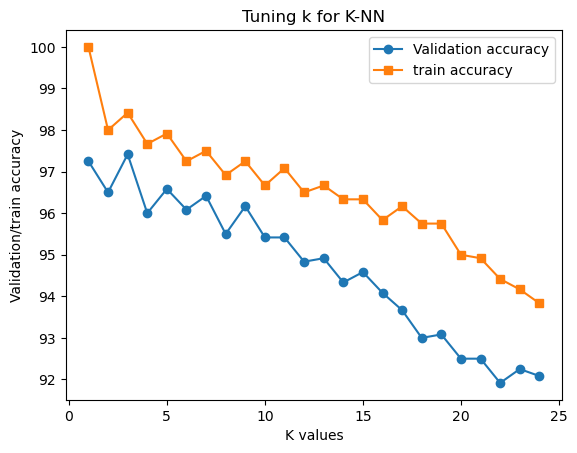

In [95]:
if __name__ == "__main__":
    

    
    knnAnalysis()
    
    

In [96]:
def crossValidation(model):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    return scores.mean()
    

In [97]:
def runRandomTreeClassifier():
    # vary depth 1 to 26  and number of estimators 10 to 100
    print("------------Random Tree Classifier-------------------")
    
    depths=[]
    rf_trainaccuracy = []
    rf_valaccuracy = []
    for depth in range(1,28,2):
        print("depth : " + str(depth))
        depths.append(depth)
        rf_depth = RandomForestClassifier(max_depth=depth,n_estimators=100,random_state=0)
        rf_depth.fit(X_train,y_train)
        print("training accuarcy of Random Forest : "+str(rf_depth.score(X_train, y_train)))
        rf_trainaccuracy.append(rf_depth.score(X_train, y_train)*100)
        valScore = crossValidation(rf_depth)
        print("validation accuracy scores of Random Forest : "+ str(valScore))
        rf_valaccuracy.append(valScore*100)
    
    plt.figure()
    plt.plot(depths, rf_valaccuracy , marker='o')
    plt.plot(depths, rf_trainaccuracy, marker='s')
    plt.xlabel('RF depth values')
    plt.ylabel('Validation/train accuracy')
    plt.legend(['Validation accuracy', 'train accuracy'])
    plt.title('Tuning maxdepth for Random Forest')
    
# =============================================================================
#     # lets fix the depth = 6  validation accuracy scores  : 0.4008333333333334 
#     nof_trainaccuracy = []
#     nof_valaccuracy = []
#     no_of_estimators = []
#     for i in range (10 ,160,10):
#         no_of_estimators.append(i)
#         nof = RandomForestClassifier(max_depth = 6,n_estimators= i,random_state=0)
#         nof.fit(X_train,y_train)
#         print("training accuarcy of Random Forest : "+str(nof.score(X_train, y_train)))
#         nof_trainaccuracy.append(nof.score(X_train, y_train)*100)
#         valScore = crossValidation(nof)
#         print("validation accuracy scores of Random Forest : "+ str(valScore))
#         nof_valaccuracy.append(valScore*100)
#         
#     plt.figure()
#     plt.plot(no_of_estimators, nof_valaccuracy , marker='o')
#     plt.plot(no_of_estimators, nof_trainaccuracy, marker='s')
#     plt.xlabel('RF no of estimator values')
#     plt.ylabel('Validation/train accuracy')
#     plt.legend(['Validation accuracy', 'train accuracy'])
#     
# =============================================================================
    # after no of estimator = 60 almost linear let' fix no of estimators = 100
    
    # trail
    
    depth = 27 
    no_of_est = 100
    rf = RandomForestClassifier(max_depth = depth,n_estimators= no_of_est,random_state=0)
    rf.fit(X_train,y_train)
    print("training accuarcy of Random Forest trail : "+str(rf.score(X_train, y_train)))
    #nof_trainaccuracy.append(rf.score(X_train, y_train)*100)
    valScore = crossValidation(rf)
    print("validation accuracy scores of Random Forest 5trail: "+ str(valScore))
    

------------Random Tree Classifier-------------------
depth : 1
training accuarcy of Random Forest : 0.4766666666666667
validation accuracy scores of Random Forest : 0.4625
depth : 3
training accuarcy of Random Forest : 0.8183333333333334
validation accuracy scores of Random Forest : 0.7358333333333333
depth : 5
training accuarcy of Random Forest : 0.9308333333333333
validation accuracy scores of Random Forest : 0.8458333333333332
depth : 7
training accuarcy of Random Forest : 0.9733333333333334
validation accuracy scores of Random Forest : 0.9141666666666668
depth : 9
training accuarcy of Random Forest : 0.9858333333333333
validation accuracy scores of Random Forest : 0.9425000000000001
depth : 11
training accuarcy of Random Forest : 0.9966666666666667
validation accuracy scores of Random Forest : 0.9458333333333334
depth : 13
training accuarcy of Random Forest : 1.0
validation accuracy scores of Random Forest : 0.9525
depth : 15
training accuarcy of Random Forest : 1.0
validation acc

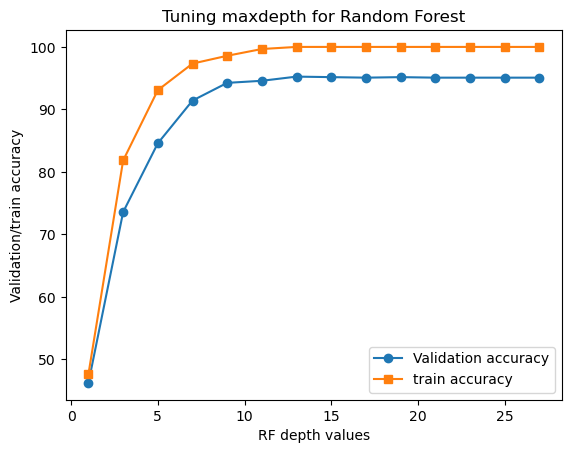

In [98]:
if __name__ == "__main__":
    

    
    runRandomTreeClassifier()
    

In [99]:
def letsBagKNNClassifier():
    
    print("------------Baggin KNN Classifier-------------------")
    k_s=[]
    bagofknn_trainaccuracy = []
    bagofknn_valaccuracy = []
    
    for k in range(1,25,2):
        print("k : " + str(k)) 
        k_s.append(k)
        clf = BaggingClassifier(KNN(n_neighbors= k, weights='uniform', algorithm='auto', leaf_size=10, p=1, metric='minkowski', metric_params=None, n_jobs=1))
        clf.fit(X_train, y_train)
        bagofknn_trainaccuracy.append(clf.score(X_train, y_train))
        print("training accuarcy of KNN bags : "+str(clf.score(X_train, y_train)))
        valScore = crossValidation(clf)
        print("validation accuracy scores of KNN bags : "+ str(valScore))
        bagofknn_valaccuracy.append(valScore)
    
    plt.figure()
    plt.plot(k_s, bagofknn_valaccuracy , marker='o')
    plt.plot(k_s, bagofknn_trainaccuracy, marker='s')
    plt.xlabel('Bag of KNN depth values')
    plt.ylabel('Validation/train accuracy')
    plt.legend(['Validation accuracy', 'train accuracy'])
    plt.title('Tuning n_neighbours for Bag of KNN')
    
    k=4
    clf1 = BaggingClassifier(KNN(n_neighbors= k, weights='uniform', algorithm='auto', leaf_size=10, p=1, metric='minkowski', metric_params=None, n_jobs=1))
    clf1.fit(X_train, y_train)
    print("training accuarcy of KNN trial bags : "+str(clf1.score(X_train, y_train)))
    valScore = crossValidation(clf1)
    print("validation accuracy scores of KNN trial bags : "+ str(valScore))
    

------------Baggin KNN Classifier-------------------
k : 1
training accuarcy of KNN bags : 0.9975
validation accuracy scores of KNN bags : 0.9741666666666667
k : 3
training accuarcy of KNN bags : 0.985
validation accuracy scores of KNN bags : 0.97
k : 5
training accuarcy of KNN bags : 0.98
validation accuracy scores of KNN bags : 0.9666666666666666
k : 7
training accuarcy of KNN bags : 0.975
validation accuracy scores of KNN bags : 0.9608333333333332
k : 9
training accuarcy of KNN bags : 0.9666666666666667
validation accuracy scores of KNN bags : 0.96
k : 11
training accuarcy of KNN bags : 0.965
validation accuracy scores of KNN bags : 0.9533333333333334
k : 13
training accuarcy of KNN bags : 0.965
validation accuracy scores of KNN bags : 0.9491666666666667
k : 15
training accuarcy of KNN bags : 0.9608333333333333
validation accuracy scores of KNN bags : 0.9441666666666666
k : 17
training accuarcy of KNN bags : 0.9558333333333333
validation accuracy scores of KNN bags : 0.9366666666666

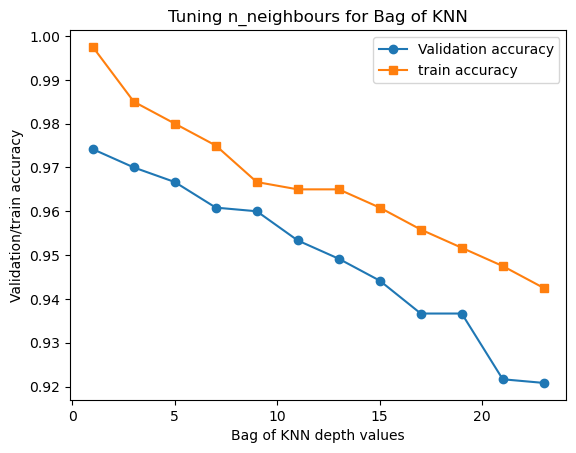

In [100]:
if __name__ == "__main__":
    

    
    letsBagKNNClassifier()
    

In [101]:
def svmClassifier():
    print("----- SVM Tuning --------")
    param_grid = { 'C':[0.1,1,100,1000],'kernel':['poly'],'degree':[1,2,3,4]}
    grid = GridSearchCV(SVC(),param_grid)
    grid.fit(X_train,y_train)
    print("training accuarcy of SVC trial : "+str(grid.score(X_train, y_train)))
    print(grid.best_params_)
    valScore = crossValidation(grid)
    print("validation accuracy scores of SVC trial  : "+ str(valScore))
    

In [102]:
if __name__ == "__main__":
    

    
    svmClassifier()
    

----- SVM Tuning --------
training accuarcy of SVC trial : 0.9825
{'C': 100, 'degree': 4, 'kernel': 'poly'}
validation accuracy scores of SVC trial  : 0.9649999999999999


In [103]:
    
def modelTestPerformance():
    print("------------Test Performance-------------------")
    #k value:8
    #training accuarcy of knnmodel : 0.5436111111111112
    #validation accuracy scores of knn : 0.39138888888888884
    knn = KNeighborsClassifier(8)
    knn.fit(X_train, y_train)
    knnpredictTest = knn.predict(X_test)
    KNNtest_accuracy = accuracy_score(y_test, knnpredictTest)
   
    print("------------KNN with k=8 Performance-------------------")
    print("%0.2f accuracy KNN with k=8"% KNNtest_accuracy )
    print(cr(y_test,knnpredictTest))
    
    cm1 = confusion_matrix(y_test, knnpredictTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
    disp.plot()
    plt.title('Confusion matrix for KNN with k =8 ')
    plt.show()
    #for depth6
    #training accuarcy of dTREE : 0.4513888888888889
    #validation accuarcy of dTREE : 0.38027777777777777
    pruneAt = 7
    scikitDescTree = tree.DecisionTreeClassifier(criterion="gini",max_depth= pruneAt)
    dtreemodel = scikitDescTree.fit(X_train, y_train)
    dtreePredictTest = dtreemodel.predict(X_test)
    dtreetest_accuracy = accuracy_score(y_test, dtreePredictTest)
    
    print("------------ Dtree with depth=7 Performance-------------------")
    print("%0.2f accuracy for dTree with depth =  7" % dtreetest_accuracy )
    print(cr(y_test,dtreePredictTest))
    
    cm2 = confusion_matrix(y_test, dtreePredictTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp.plot()
    plt.title('Confusion matrix for Dtree with depth = 7')
    plt.show()
    #depth : 27
    #training accuarcy of Random Forest : 0.9888888888888889
    #validation accuracy scores of Random Forest : 0.40138888888888885
    depth = 10
    no_of_est = 100
    rf = RandomForestClassifier(max_depth = depth,n_estimators= no_of_est,random_state=0)
    rf.fit(X_train,y_train)
    rfpredicty = rf.predict(X_test)
    rftestaccuracy = accuracy_score(y_test,rfpredicty)
    
    print("------------ Random Forest with depth=27 Performance-------------------")
    print("%0.2f accuracy for RF with depth = 27 " % rftestaccuracy )
    print(cr(y_test,rfpredicty))
 
    cm3 = confusion_matrix(y_test, rfpredicty)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
    disp.plot()
    plt.title('Confusion matrix for Random Forest with depth = 27')
    plt.show()
    #k : 3
    #training accuarcy of KNN bags : 0.7277777777777777
    #validation accuracy scores of KNN bags : 0.41083333333333333
    
    k=3
    clf1 = BaggingClassifier(KNN(n_neighbors= k, weights='uniform', algorithm='auto', leaf_size=10, p=1, metric='minkowski', metric_params=None, n_jobs=1))
    clf1.fit(X_train, y_train)
    kPredictY = clf1.predict(X_test)
    knnAccuracy = accuracy_score(y_test,kPredictY)
    
    print("------------ Bag of KNN Forest with k=3 Performance-------------------")
    print("%0.2f accuracy for knn bag k =3" % knnAccuracy )
    print(cr(y_test,kPredictY))
    
    cm4 = confusion_matrix(y_test, kPredictY)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
    disp.plot()
    plt.title('Confusion matrix for bag of KNN with k = 3')
    plt.show()
    
    
    


------------Test Performance-------------------
------------KNN with k=8 Performance-------------------
0.97 accuracy KNN with k=8
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       104
           1       0.98      0.98      0.98        98
           2       1.00      0.92      0.96        98

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



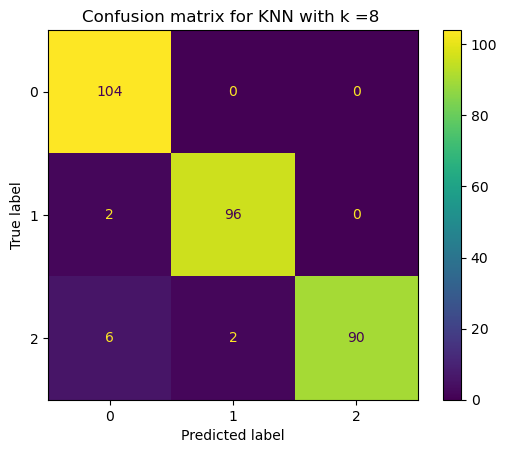

------------ Dtree with depth=7 Performance-------------------
0.76 accuracy for dTree with depth =  7
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       104
           1       0.88      0.82      0.85        98
           2       0.64      0.80      0.71        98

    accuracy                           0.76       300
   macro avg       0.78      0.76      0.77       300
weighted avg       0.78      0.76      0.77       300



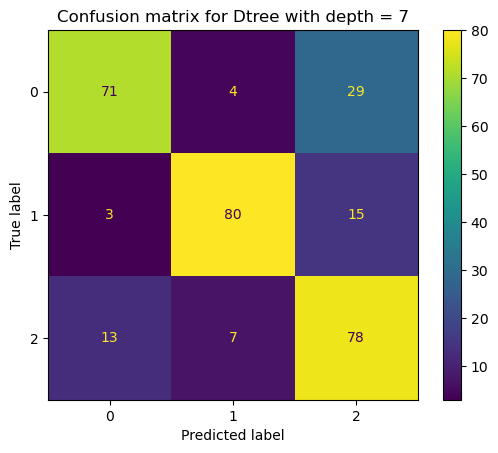

------------ Random Forest with depth=27 Performance-------------------
0.96 accuracy for RF with depth = 27 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       104
           1       0.94      0.99      0.97        98
           2       0.99      0.89      0.94        98

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



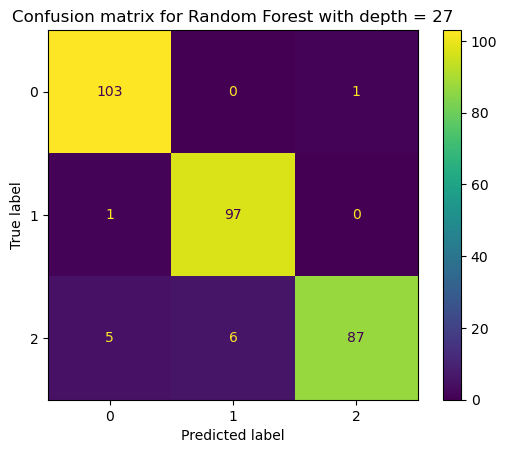

------------ Bag of KNN Forest with k=3 Performance-------------------
0.97 accuracy for knn bag k =3
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       104
           1       0.98      0.98      0.98        98
           2       1.00      0.92      0.96        98

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



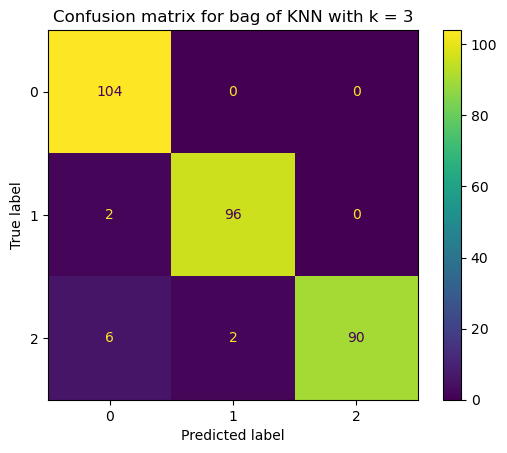

In [104]:
if __name__ == "__main__":
    

    
    modelTestPerformance()
   
   
    